In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('titanic(2).csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

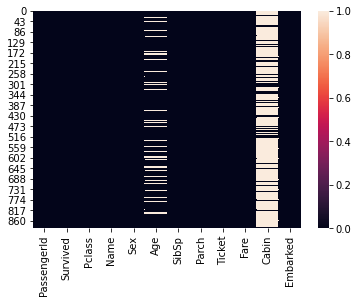

In [5]:
import seaborn as sns

sns.heatmap(df.isnull())

In [6]:
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<AxesSubplot:>

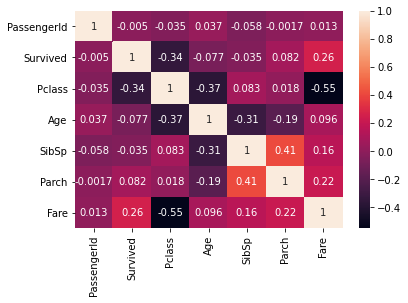

In [7]:
sns.heatmap(df.corr(),annot=True)

In [8]:
data=pd.read_csv('titanic(2).csv',usecols=['Pclass','Sex','Age','SibSp','Parch','Embarked','Fare','Survived'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
data.Sex=data.Sex.map({'male':0,'female':1})

# data.head()

In [11]:
embarked=pd.get_dummies(data['Embarked'],drop_first=True)
ndata=pd.concat([data,embarked],axis=1)
ndata=ndata.drop('Embarked',axis=1)
ndata.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1


In [12]:
ndata.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Q             0
S             0
dtype: int64

In [21]:
def input_missing_age(columns):
    age=columns[0]
    passenger_class=columns[1]
    if pd.isnull(age):
        if(passenger_class==1):
            return ndata[ndata['Pclass']==1]['Age'].mean()
        if(passenger_class==2):
            return ndata[ndata['Pclass']==2]['Age'].mean()
        if(passenger_class==3):
            return ndata[ndata['Pclass']==3]['Age'].mean()
    else:
        return age
    
ndata['Age']=ndata[['Age','Pclass']].apply(input_missing_age,axis=1)
ndata.dropna(inplace=True)
# ndata.isnull().sum()

In [28]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,auc
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [33]:
x=ndata.drop('Survived',axis=1)
y=ndata['Survived']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)


Decision Tree Fitting


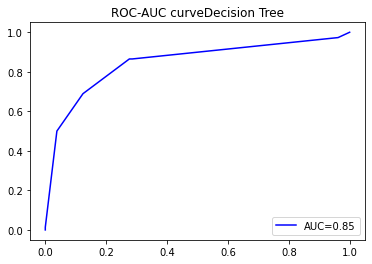

Logistic Fitting


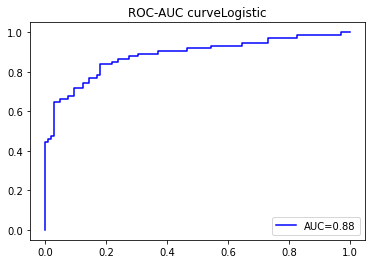

Random Forest Fitting


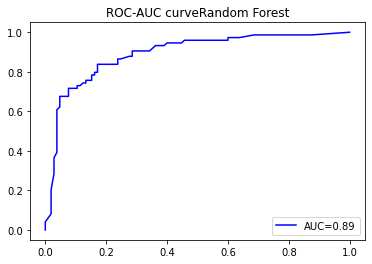

Bagging Classifier Fitting


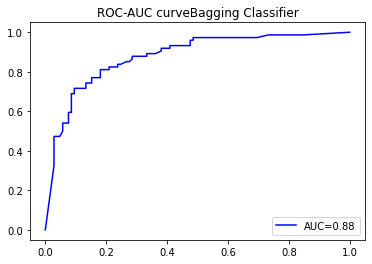

Extra trees Fitting


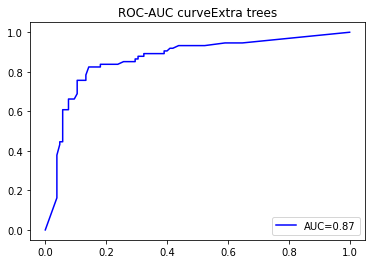

Adaboost Fitting


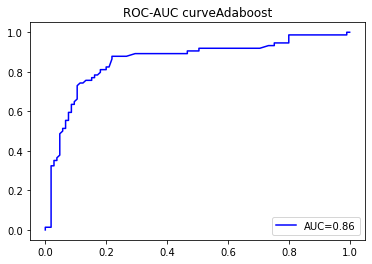

Model scores
Decision Tree with scores0.799
Logistic with scores0.816
Random Forest with scores0.816
Bagging Classifier with scores0.804
Extra trees with scores0.821
Adaboost with scores0.816


In [34]:
n_estimators=100

models=[DecisionTreeClassifier(max_depth=3),\
       LogisticRegression(),\
       RandomForestClassifier(n_estimators=n_estimators),\
       BaggingClassifier(n_estimators=n_estimators),\
       ExtraTreesClassifier(n_estimators=n_estimators),\
       AdaBoostClassifier(n_estimators=n_estimators)]

model_title=['Decision Tree','Logistic','Random Forest','Bagging Classifier','Extra trees','Adaboost']


surv_pred,surv_prob,scores,fprs,tprs,thres=([] for i in range(len(model_title)))

for i,model in enumerate(models):
    print(f'{model_title[i]} Fitting')
    clf=model.fit(xtrain,ytrain)
    surv_pred.append(model.predict(xtest))
    surv_prob.append(model.predict_proba(xtest))
    scores.append(model.score(xtest,ytest))
    
    fpr,tpr,thresholds=roc_curve(ytest,surv_prob[i][:,1])
    fprs.append(fpr)
    tprs.append(tpr)
    thres.append(thresholds) 
    
    
    plt.title(f'ROC-AUC curve{model_title[i]}')
    roc_auc=auc(fpr,tpr)
    plt.plot(fpr,tpr,'b',label='AUC=%0.2f'%roc_auc)
    plt.legend(loc='lower right')
    plt.show()
    
print('Model scores')
for i,score in enumerate(scores):
    print(f'{model_title[i]} with scores{score:0.3f}')

In [ ]:
# if u want to improve the scores ...
# pruning, max_depth ....